In [10]:
cfg_path = 'configs/cfg_clean_split_random_UWIN_Norm_Rot_Blur.yaml'
split = 'val'
output_folder = '/datadrive/animals_training_dataset/predictions/tuw_uwin_nonred2'

In [11]:
import yaml
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch

from util import init_seed
from train import create_dataloader, load_model 

/anaconda/envs/tutorialenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/anaconda/envs/tutorialenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Resuming from epoch 300


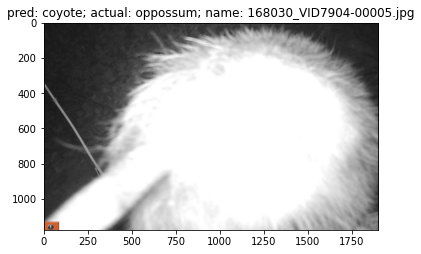

oppossum/168030_VID7904-00005.jpg


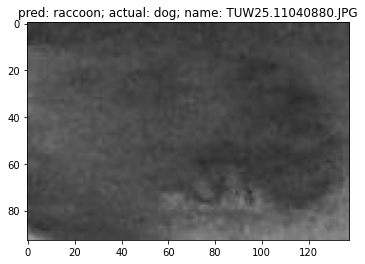

dog/TUW25.11040880.JPG


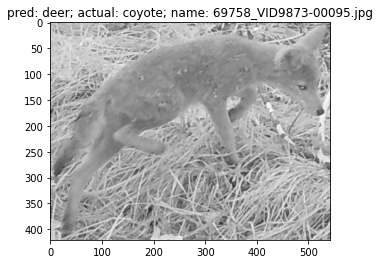

coyote/69758_VID9873-00095.jpg


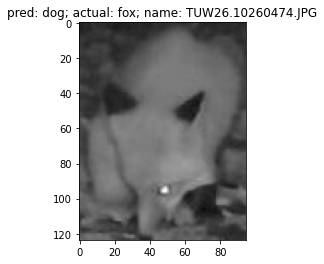

fox/TUW26.10260474.JPG


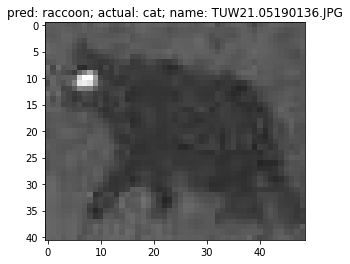

cat/TUW21.05190136.JPG


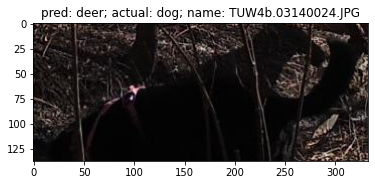

dog/TUW4b.03140024.JPG


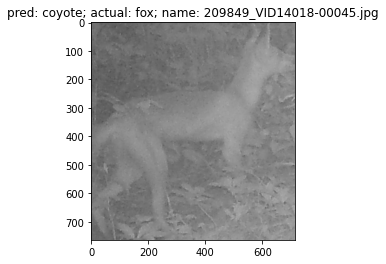

fox/209849_VID14018-00045.jpg


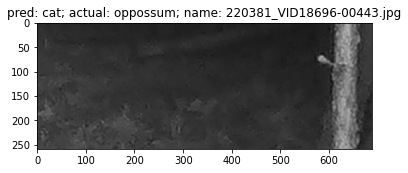

oppossum/220381_VID18696-00443.jpg


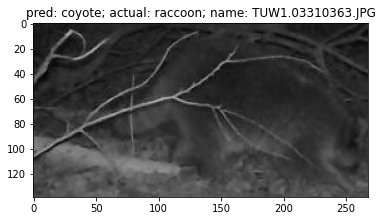

raccoon/TUW1.03310363.JPG


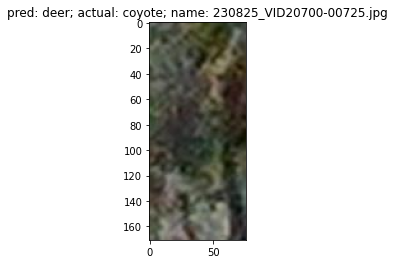

coyote/230825_VID20700-00725.jpg


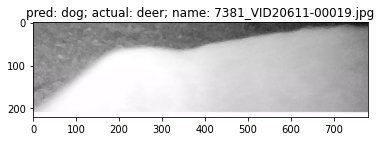

deer/7381_VID20611-00019.jpg


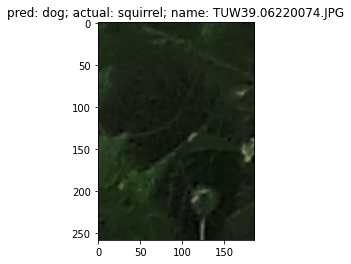

squirrel/TUW39.06220074.JPG


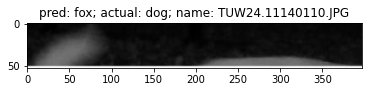

dog/TUW24.11140110.JPG


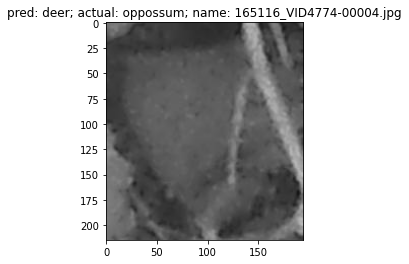

oppossum/165116_VID4774-00004.jpg


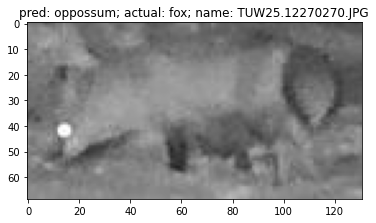

fox/TUW25.12270270.JPG


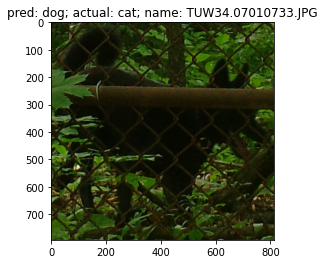

cat/TUW34.07010733.JPG


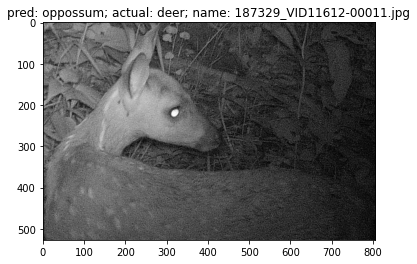

deer/187329_VID11612-00011.jpg


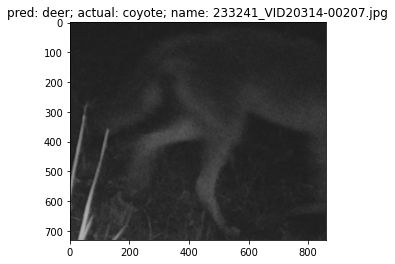

coyote/233241_VID20314-00207.jpg


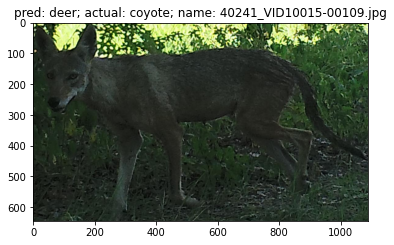

coyote/40241_VID10015-00109.jpg


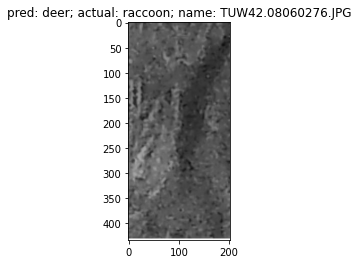

raccoon/TUW42.08060276.JPG


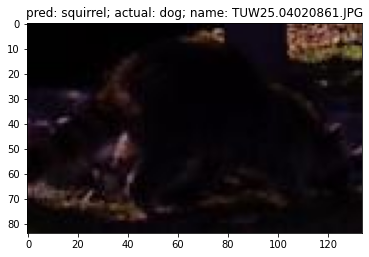

dog/TUW25.04020861.JPG


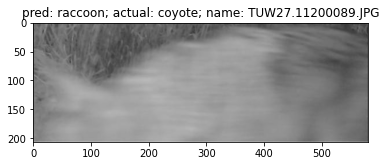

coyote/TUW27.11200089.JPG


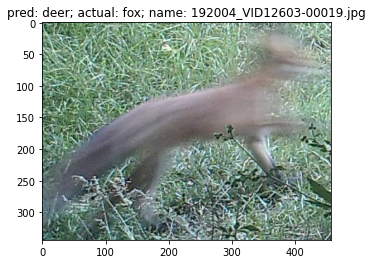

fox/192004_VID12603-00019.jpg


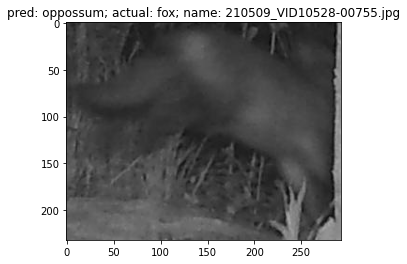

fox/210509_VID10528-00755.jpg


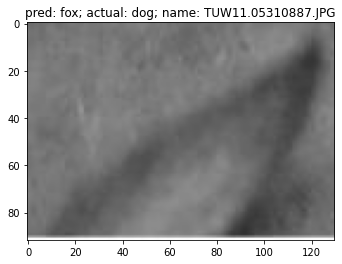

dog/TUW11.05310887.JPG


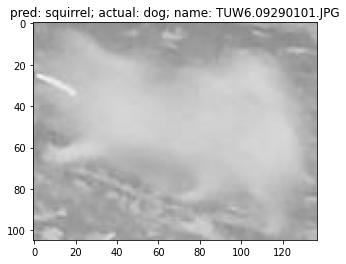

dog/TUW6.09290101.JPG


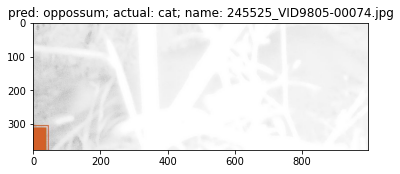

cat/245525_VID9805-00074.jpg


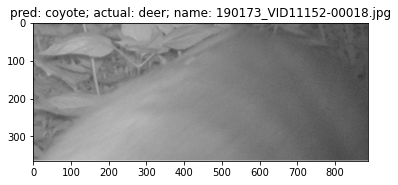

deer/190173_VID11152-00018.jpg


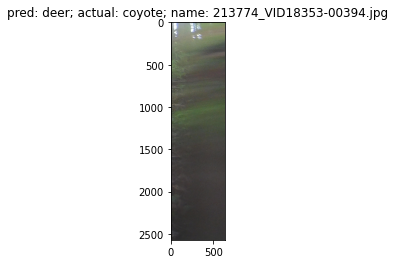

coyote/213774_VID18353-00394.jpg


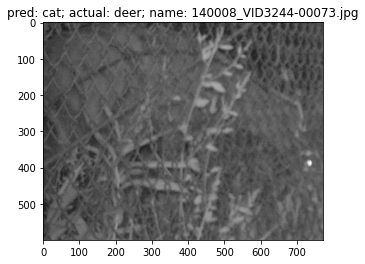

deer/140008_VID3244-00073.jpg


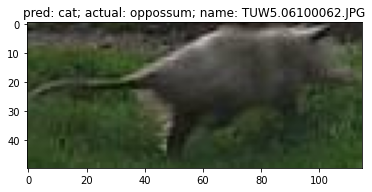

oppossum/TUW5.06100062.JPG


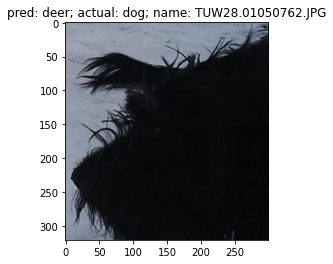

dog/TUW28.01050762.JPG


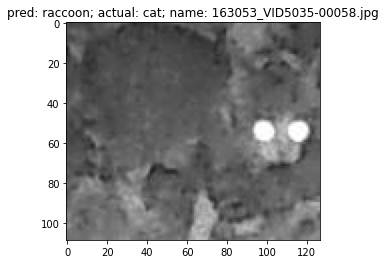

cat/163053_VID5035-00058.jpg


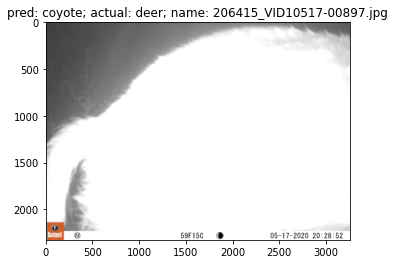

deer/206415_VID10517-00897.jpg


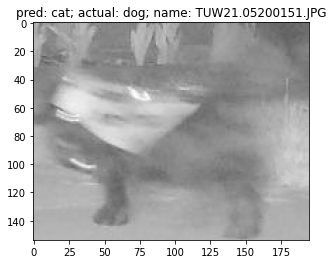

dog/TUW21.05200151.JPG


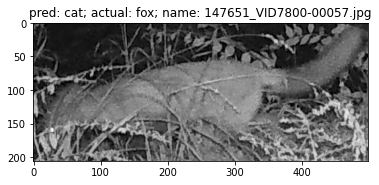

fox/147651_VID7800-00057.jpg


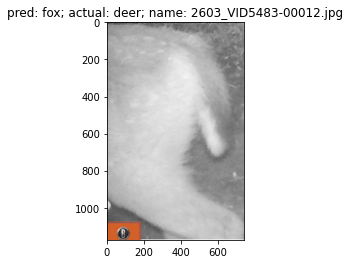

deer/2603_VID5483-00012.jpg


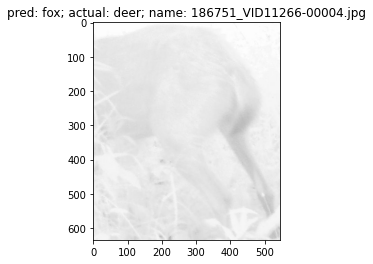

deer/186751_VID11266-00004.jpg


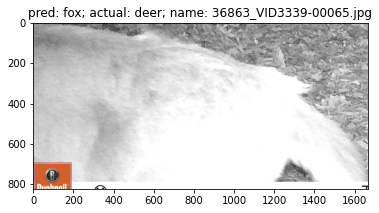

deer/36863_VID3339-00065.jpg


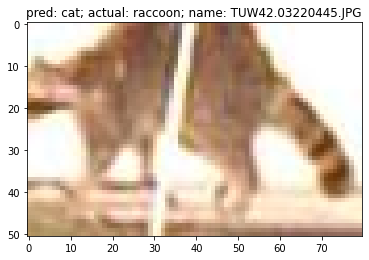

raccoon/TUW42.03220445.JPG


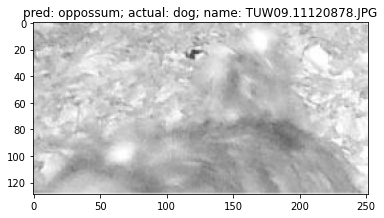

dog/TUW09.11120878.JPG


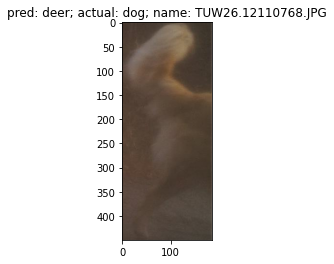

dog/TUW26.12110768.JPG


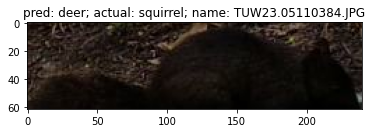

squirrel/TUW23.05110384.JPG


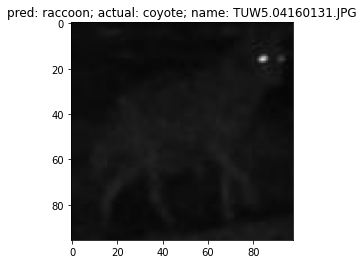

coyote/TUW5.04160131.JPG


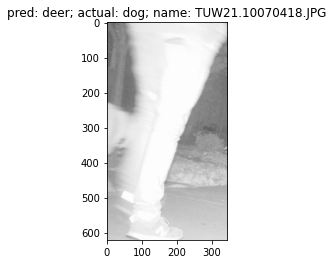

dog/TUW21.10070418.JPG


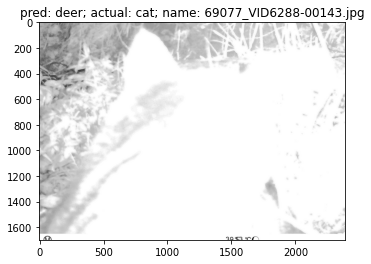

cat/69077_VID6288-00143.jpg


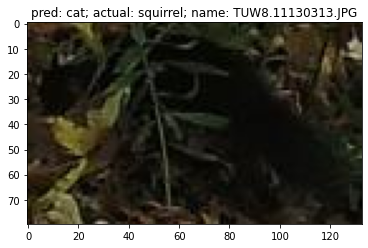

squirrel/TUW8.11130313.JPG


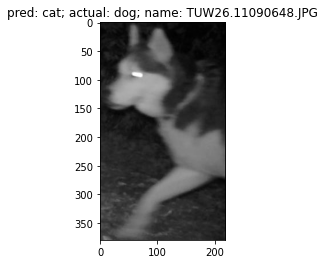

dog/TUW26.11090648.JPG


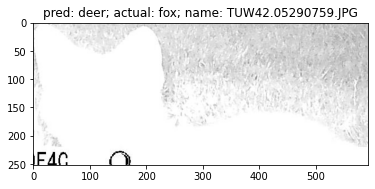

fox/TUW42.05290759.JPG


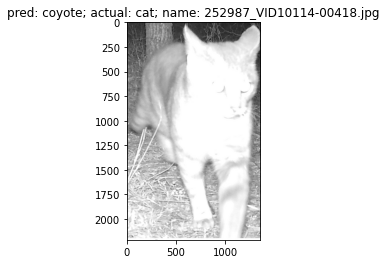

cat/252987_VID10114-00418.jpg


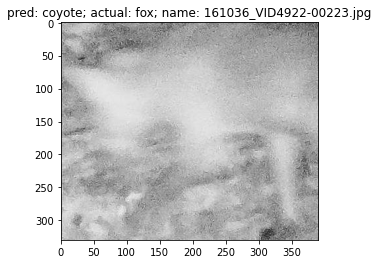

fox/161036_VID4922-00223.jpg


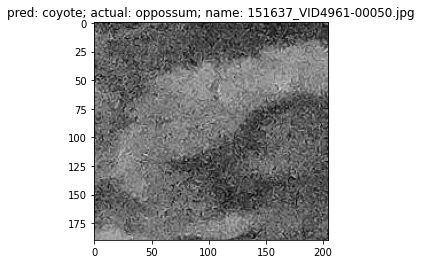

oppossum/151637_VID4961-00050.jpg


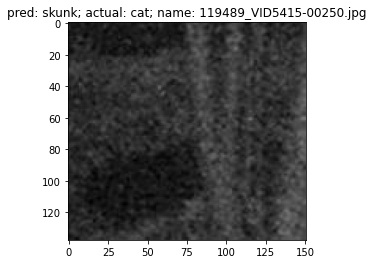

cat/119489_VID5415-00250.jpg


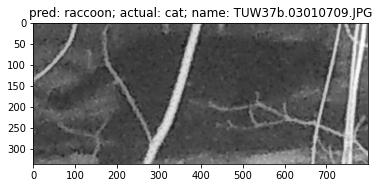

cat/TUW37b.03010709.JPG


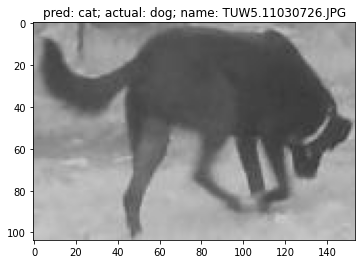

dog/TUW5.11030726.JPG


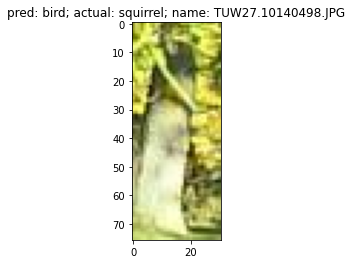

squirrel/TUW27.10140498.JPG


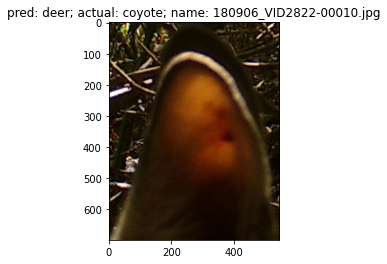

coyote/180906_VID2822-00010.jpg


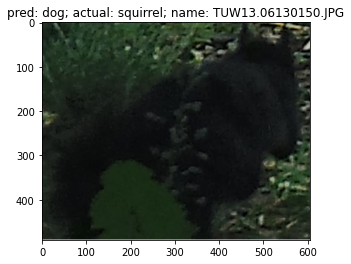

squirrel/TUW13.06130150.JPG


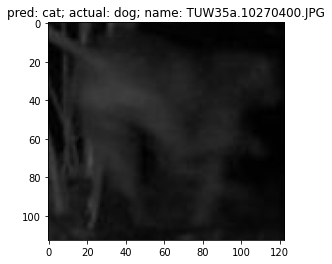

dog/TUW35a.10270400.JPG


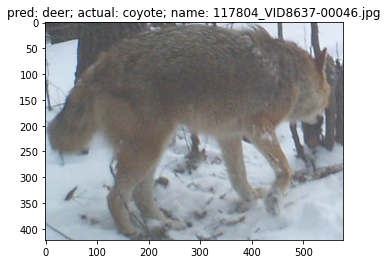

coyote/117804_VID8637-00046.jpg


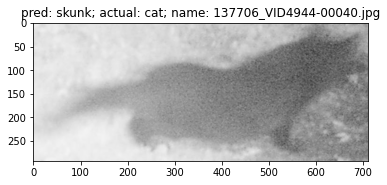

cat/137706_VID4944-00040.jpg


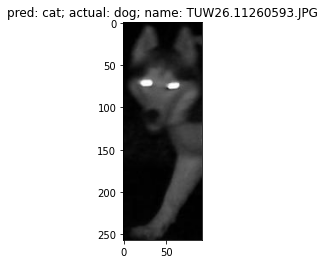

dog/TUW26.11260593.JPG


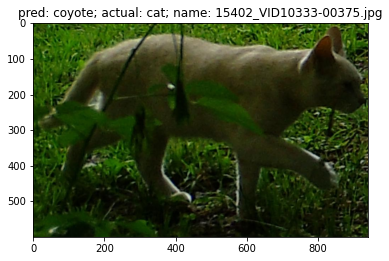

cat/15402_VID10333-00375.jpg


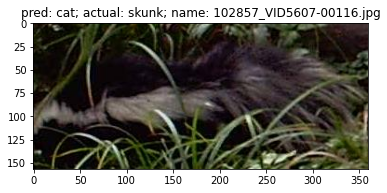

skunk/102857_VID5607-00116.jpg


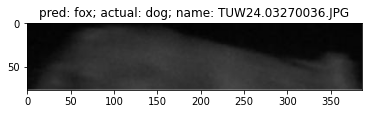

dog/TUW24.03270036.JPG


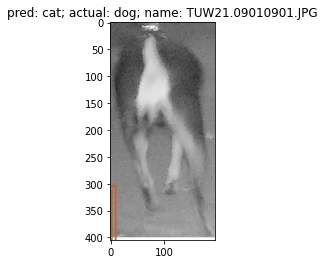

dog/TUW21.09010901.JPG


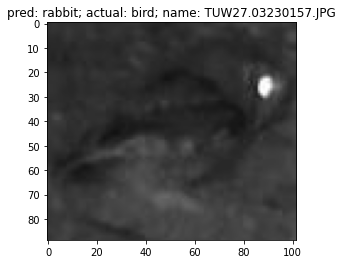

bird/TUW27.03230157.JPG


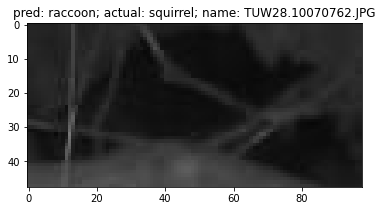

squirrel/TUW28.10070762.JPG


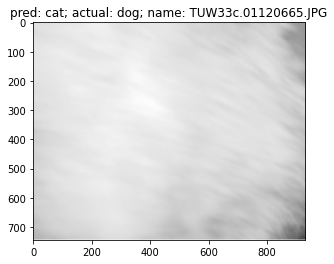

dog/TUW33c.01120665.JPG


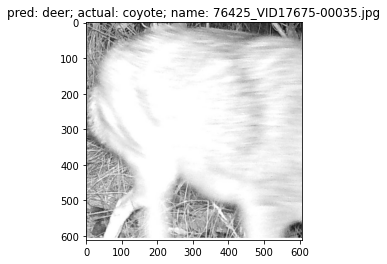

coyote/76425_VID17675-00035.jpg


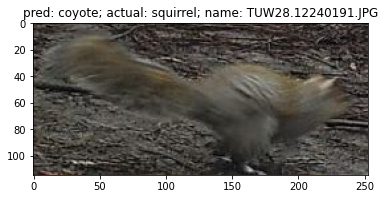

squirrel/TUW28.12240191.JPG


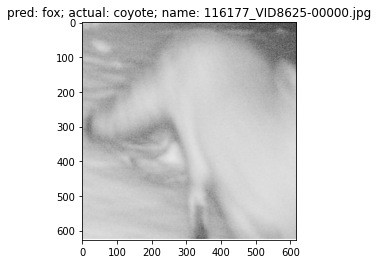

coyote/116177_VID8625-00000.jpg


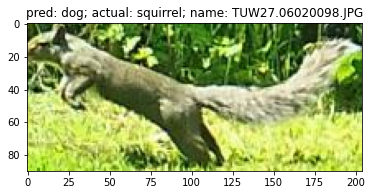

squirrel/TUW27.06020098.JPG


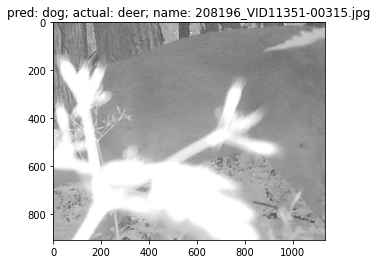

deer/208196_VID11351-00315.jpg


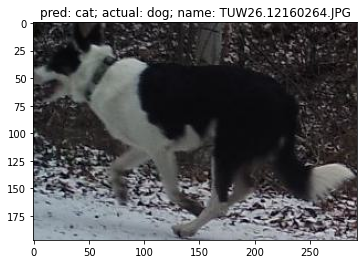

dog/TUW26.12160264.JPG


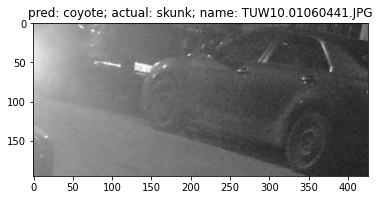

skunk/TUW10.01060441.JPG


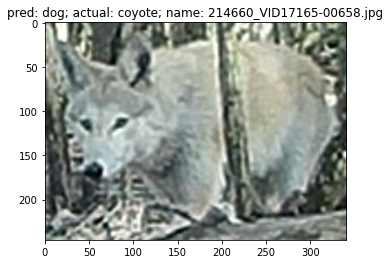

coyote/214660_VID17165-00658.jpg


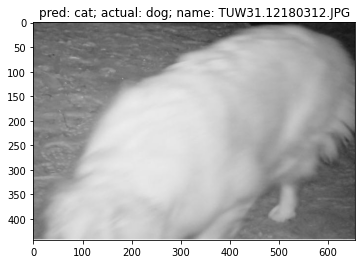

dog/TUW31.12180312.JPG


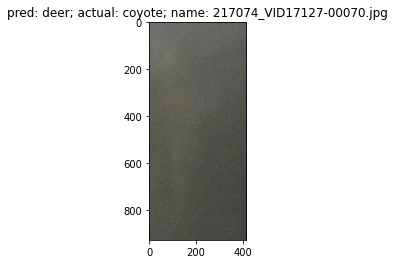

coyote/217074_VID17127-00070.jpg


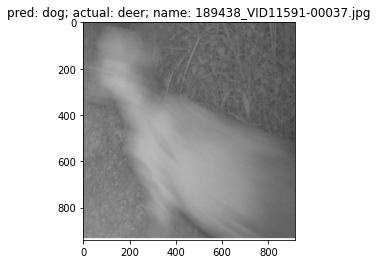

deer/189438_VID11591-00037.jpg


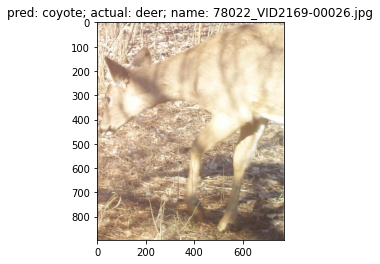

deer/78022_VID2169-00026.jpg


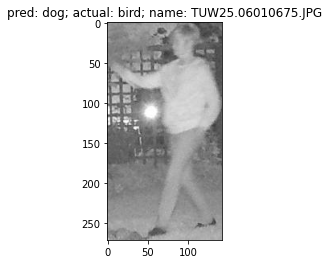

bird/TUW25.06010675.JPG


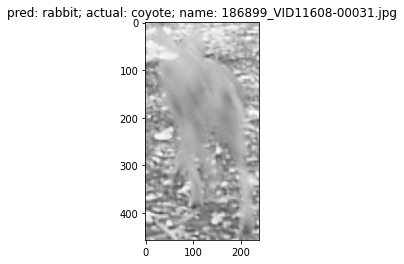

coyote/186899_VID11608-00031.jpg


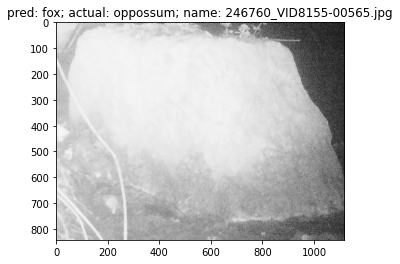

oppossum/246760_VID8155-00565.jpg


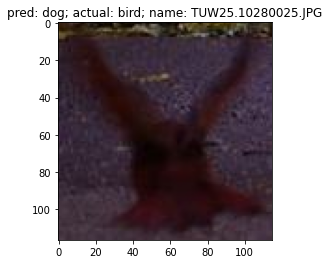

bird/TUW25.10280025.JPG


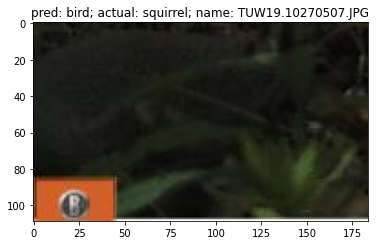

squirrel/TUW19.10270507.JPG


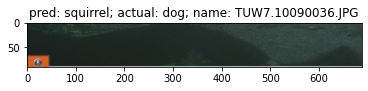

dog/TUW7.10090036.JPG


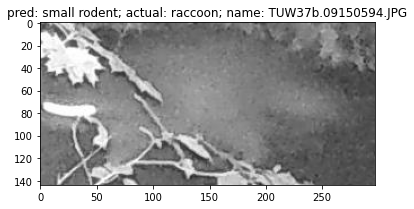

raccoon/TUW37b.09150594.JPG


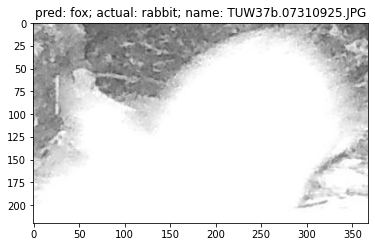

rabbit/TUW37b.07310925.JPG


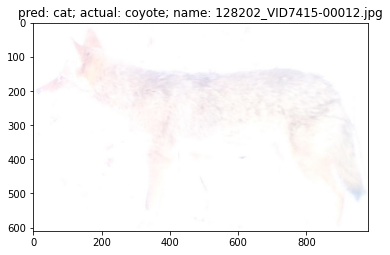

coyote/128202_VID7415-00012.jpg


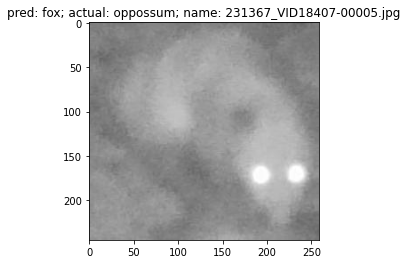

oppossum/231367_VID18407-00005.jpg


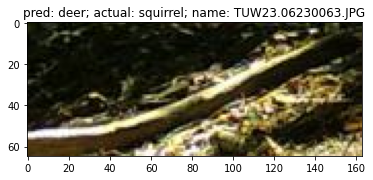

squirrel/TUW23.06230063.JPG


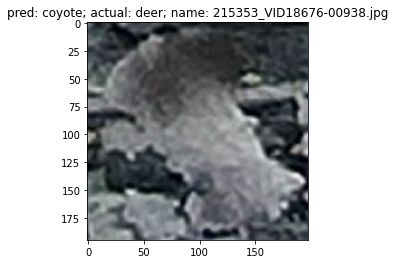

deer/215353_VID18676-00938.jpg


In [12]:
cfg = yaml.safe_load(open(cfg_path, 'r'))
cfg['model_dir'] = os.path.join('..', '..', cfg['model_dir'])
init_seed(cfg.get('seed', None))
device = cfg['device']
if device != 'cpu' and not torch.cuda.is_available():
    print(f'WARNING: device set to "{device}" but CUDA not available; falling back to CPU...')
    cfg['device'] = 'cpu'

dataLoader = create_dataloader(cfg, split=split)
classnames = dict([v,k] for k,v in dataLoader.dataset.species_to_index_mapping.items())
model, epoch = load_model(cfg)
model.to(device)
model.eval()

err_name = []
err_pred=[]
err_orig=[]
with torch.no_grad():
    for idx, (data, label, image_path) in enumerate(dataLoader):
        
        data = data.to(device)
        prediction = model(data)
        predict_label = torch.argmax(prediction.cpu(), dim=1)

        
        error = torch.nonzero(predict_label != label)
        
        for err in error:
            _, fname = os.path.split(image_path[err])
            plt.figure()
            plt.imshow(Image.open(image_path[err]))
            plt.title(f'pred: {classnames[predict_label[err].item()]}; actual: {classnames[label[err].item()]}; name: {fname}')
            plt.show()
            print(f'{classnames[label[err].item()]}/{fname}')
            dest = os.path.join(f'err_figs/tuw_uwin_nonred2/{classnames[predict_label[err].item()]}')
            #os.makedirs(dest, exist_ok=True)
            #plt.savefig(os.path.join(dest, fname))
            #print(image_path[err])
            pred = classnames[predict_label[err].item()]
            orig = classnames[label[err].item()]
            err_name.append(fname)
            err_pred.append(pred)
            err_orig.append(orig)


            break
        

    

In [13]:
# import pandas as pd
# tuple_list = list(zip(err_pred, err_orig, err_name))
# df = pd.DataFrame(tuple_list, columns = ['predicted', 'original', 'name'])
# #print(df)
# #df.to_csv('erros_foccsd')

In [14]:
#print(df)
#df.to_csv('erros_tuw_uwin')
print(len(err_name))

93


In [15]:

######check how many photos per train val test
train = r'/datadrive/animals_training_dataset/tuw_uwin_nonred2/split_random/train.txt'
val = r'/datadrive/animals_training_dataset/tuw_uwin_nonred2/split_random/val.txt'
test = r'/datadrive/animals_training_dataset/tuw_uwin_nonred2/split_random/test.txt'

with open(train) as f:
    train_df = f.readlines()
with open(val) as f:
    val_df = f.readlines()
with open(test) as f:
    test_df = f.readlines()

print(len(train_df))
print(len(val_df))
print(len(test_df))

71501
11897
35755


In [16]:
for idx in enumerate(dataLoader):
    print(idx)



(0, [tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.80